# Lesson 1

## 1. Objectives

The main objective of this notebook is to replicate the results from the first lesson of Fast AI course (https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb).

I decided to do the following:
1. Create vgg16 model based on vgg16 class. It should be able to distinguish between cats and dogs.
2. Take part in the Dogs vs Cats Kaggle Competition
3. Create vgg16 model which works on some other dataset.

Data should be downloaded from http://files.fast.ai/data/dogscats.zip and put into data directory.

## 2. Setting up

In [1]:
%matplotlib inline
from __future__ import division,print_function

import os, json 
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## 3. VGG16 - cats and dogs

In [4]:
# path = os.path.join("..","data","dogscats")
path = os.path.join("..","data","dogscats","sample")

In [5]:
batch_size = 64

In [6]:
network = Vgg16()

In [ ]:
train_batches = network.get_batches(os.path.join(path, "train"))
validation_batches = network.get_batches(os.path.join(path, "valid"))
network.finetune(train_batches)

In [ ]:
network.fit(train_batches, validation_batches)

In [ ]:
batches = network.get_batches(os.path.join(path,"train"), batch_size=4)

In [ ]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

## 4. Kaggle competition 

In [4]:
path = os.path.join("..", "dogscats_data")

To download the data follow the instructions: http://wiki.fast.ai/index.php/Kaggle_CLI and put the dat a to the dogscats_data directory.

In [22]:
import glob
import shutil

In [23]:
def safe_mkdir(path):
    """
    Checks if a directory exists. If not, creates it.
    """
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        pass
    except AttributeError as exc:
        pass

Creating training and validation set.

Also, puts test data into a structure where we can use get_batches method easily.

In [24]:
cats_train_path = os.path.join(path, "train_grouped", "cats")
cats_valid_path = os.path.join(path, "valid_grouped", "cats")
safe_mkdir(cats_train_path)
safe_mkdir(cats_valid_path)


dogs_train_path = os.path.join(path, "train_grouped", "dogs")
dogs_valid_path = os.path.join(path, "valid_grouped", "dogs")
safe_mkdir(dogs_train_path)
safe_mkdir(dogs_valid_path)

filenames = glob.glob(os.path.join(path, "train", "*"))

cats_counter = 0
dogs_counter = 0
for filename in filenames:
    name = filename.split("/")[-1]
    if "cat" in name:
        if cats_counter < 3:
            shutil.copy(filename, os.path.join(cats_train_path, name))
            cats_counter += 1
        else:
            shutil.copy(filename, os.path.join(cats_valid_path, name))
            cats_counter = 0
    if "dog" in name:
        if dogs_counter < 3:
            shutil.copy(filename, os.path.join(dogs_train_path, name))
            dogs_counter += 1
        else:
            shutil.copy(filename, os.path.join(dogs_valid_path, name))
            dogs_counter = 0

In [44]:
filenames = glob.glob(os.path.join(path, "test", "*"))
for filename in filenames:
    name = filename.split("/")[-1]
    file_id = name.split('.')[0]
    test_path = os.path.join(path, "test", file_id)
    safe_mkdir(test_path)
    shutil.move(filename, os.path.join(test_path, name))

Creating and training the network

In [5]:
batch_size = 64
network = Vgg16()

In [26]:
train_batches = network.get_batches(os.path.join(path, "train_grouped"), batch_size=batch_size)
validation_batches = network.get_batches(os.path.join(path, "valid_grouped"),batch_size=batch_size)
network.finetune(train_batches)

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


In [27]:
number_of_epochs = 3
model_name = "model_2"

In [28]:
for i in range(number_of_epochs):
    network.fit(train_batches, validation_batches)
    network.model.save_weights(model_name + "_" + str(i) + ".h5")

Epoch 1/1
18750/18750 [==============================] - 781s - loss: 0.1168 - acc: 0.9684 - val_loss: 0.0567 - val_acc: 0.9848
Epoch 1/1
18750/18750 [==============================] - 784s - loss: 0.0969 - acc: 0.9776 - val_loss: 0.0552 - val_acc: 0.9840
Epoch 1/1
18750/18750 [==============================] - 784s - loss: 0.0955 - acc: 0.9790 - val_loss: 0.0601 - val_acc: 0.9850


In [9]:
network.model.save_weights("weights_2.h5")

In [6]:
network.model.load_weights("model_1_2.h5")

Predicting on the test set

In [7]:
test_batch = network.get_batches(os.path.join(path, "test"), shuffle=False, batch_size=4)

probabilities = []
image_ids = []


for i in range(1, 2):
    imgs, labels = next(test_batch)
    prediction = network.predict(img)
    if prediction[1][0] == 0:
        probability = 1 - prediction[0][0]
    else:
        probability = prediction[0][0]
    image_id = np.where(label == 1)[1][0] + 1
    probabilities.append(probability)
    image_ids.append(image_id)
    plots(imgs, titles=labels)
    network.predict(imgs, True)
    if i % 1000 == 0:
        print(i)
predictions = np.clip(probabilities, 0.02, 0.98)
results = np.transpose(np.vstack([image_ids, probabilities]))

Found 12500 images belonging to 12500 classes.
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [ ]:
test_batch = network.get_batches(os.path.join(path, "test"), shuffle=False, batch_size=4)

In [ ]:
np.savetxt("results.csv", results, delimiter=",")

In [36]:
results = np.genfromtxt("results.csv",delimiter=",")

In [23]:
with open('submission_4.csv', 'a') as the_file:
    the_file.write('id,label\n')
    for image_id, prediction in zip(image_ids, predictions):
        the_file.write(str(image_id))
        the_file.write(",")
        the_file.write(str(prediction))
        the_file.write("\n")


In [13]:
from IPython.display import FileLink
FileLink('submission_3.csv')

/home/ubuntu/fast_ai_part_1/notebooks/submission_2.csv

In [16]:
train_batches = network.get_batches(os.path.join(path, "train_grouped"), batch_size=4)

Found 18750 images belonging to 2 classes.


(array([ 1.    ,  1.    ,  0.9999,  1.    ], dtype=float32),
 array([1, 1, 0, 1]),
 [u'goldfish', u'goldfish', u'tench', u'goldfish'])

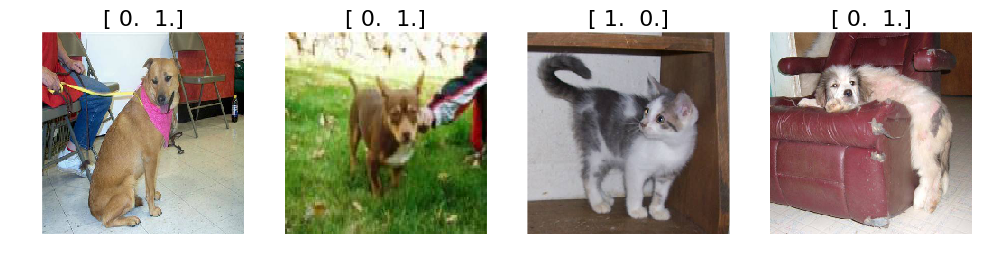

In [21]:
imgs,labels = next(train_batches)
plots(imgs, titles=labels)
network.predict(imgs, True)